# Generating Pi

In [1]:
import numpy as np
from scipy.stats import uniform, expon, gaussian_kde
import matplotlib.pyplot as plt

In [2]:
def Pi_Plot(n):
    x = uniform.rvs(loc = -1, scale = 2, size = n)
    y = uniform.rvs(loc = -1, scale = 2, size = n)
    x_in = []
    y_in = []
    x_out = []
    y_out = []
    
    for i in range(n):
        if x[i] ** 2 + y[i] ** 2 < 1:
            x_in.append(x[i])
            y_in.append(y[i])
        else:
            x_out.append(x[i])
            y_out.append(y[i])
    
    fig, axs = plt.subplots(1,1,figsize=(12,12))
    draw_circle = plt.Circle((0, 0), 1, fill=False)
    axs.set_aspect(1)
    axs.plot(x_in, y_in, '.', color = 'blue')
    axs.plot(x_out, y_out, '.', color = 'gray')
    axs.set_xlim([-1.1, 1.1])
    axs.set_ylim([-1.1, 1.1])
    axs.add_artist(draw_circle)
    axs.set_xlim
    pi = 4 * len(x_in) / n
    textstr = f'$\pi$ = {pi} \nn = {n}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=26, 
             color = 'blue', verticalalignment='top', bbox=props)
    plt.show()

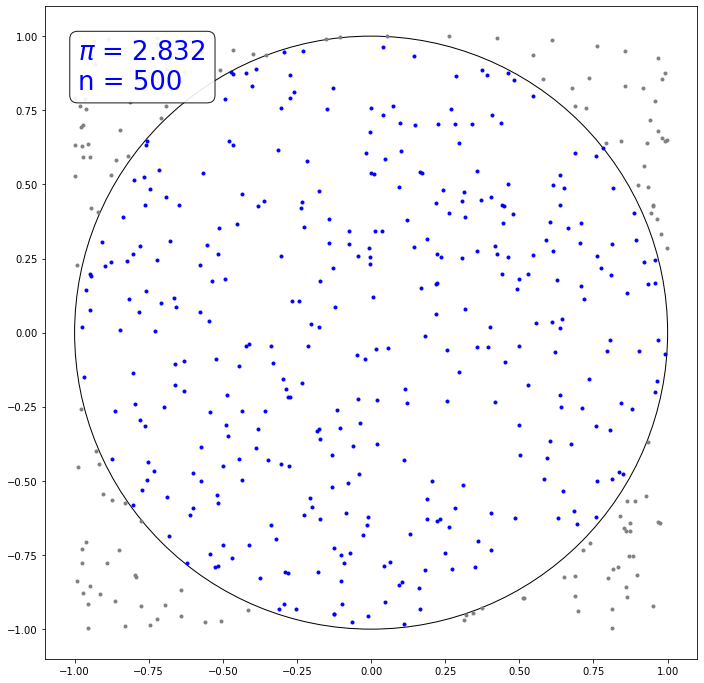

In [3]:
Pi_Plot(n=500)

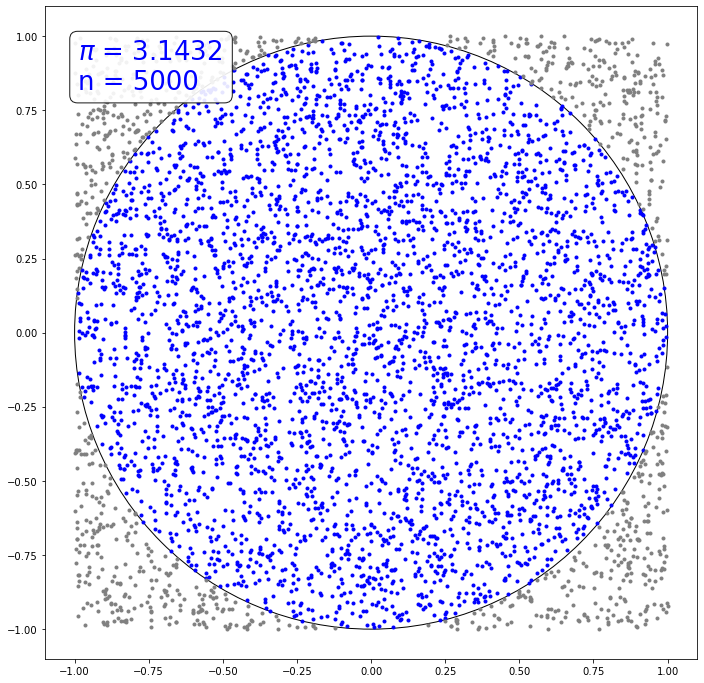

In [4]:
Pi_Plot(n=5000)

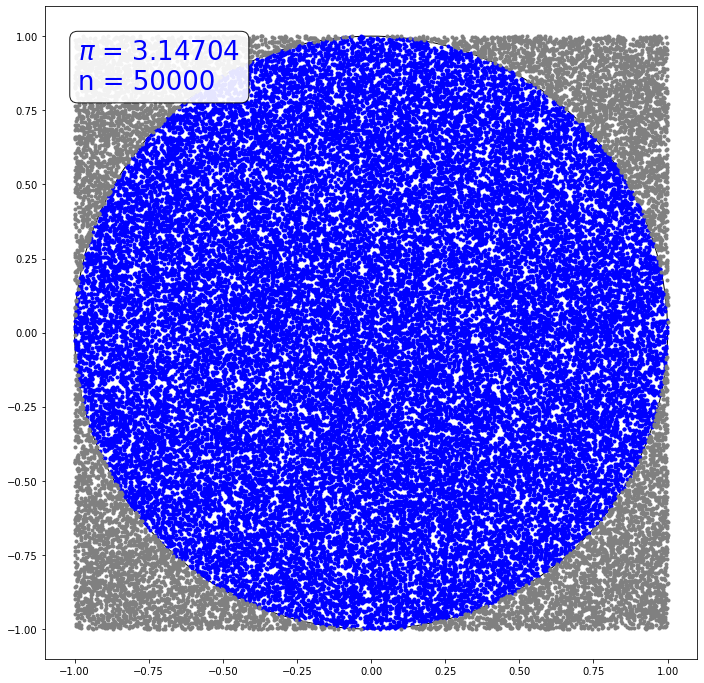

In [5]:
Pi_Plot(n=50000)

# HW 1: Monte Carlo Simulation

In [6]:
x = []

while len(x) < 10000:
    candi = expon.rvs(size = 10)
    if np.prod(candi) > 10:
        x.append(candi)

In [7]:
x1_sim = []

for i in range(len(x)):
    x1_sim.append(x[i][0])

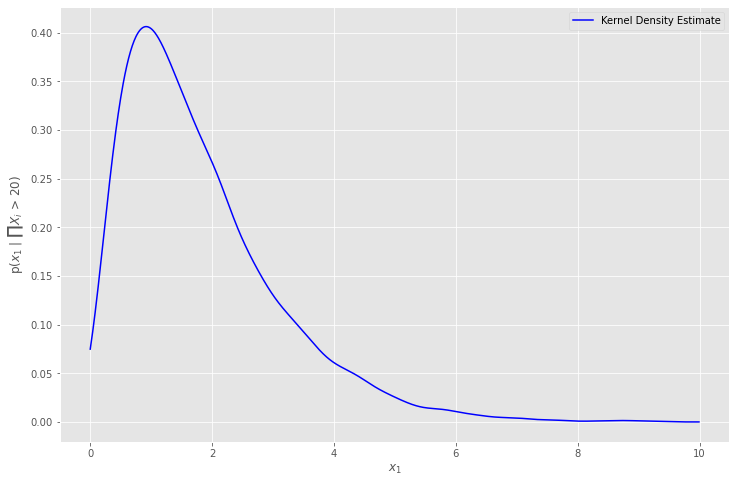

In [8]:
x1 = np.arange(0, 10, 0.01)
kde = gaussian_kde(x1_sim, bw_method='silverman')
pdf_kde = kde(x1)

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(x1, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel(r'$x_1$')
plt.ylabel(r'p($x_1$ | $\prod{X_i}$ > 20)')
plt.legend()
plt.show()

In [9]:
Prod_sim = []

for i in range(len(x)):
    Prod_sim.append(np.prod(x[i]))

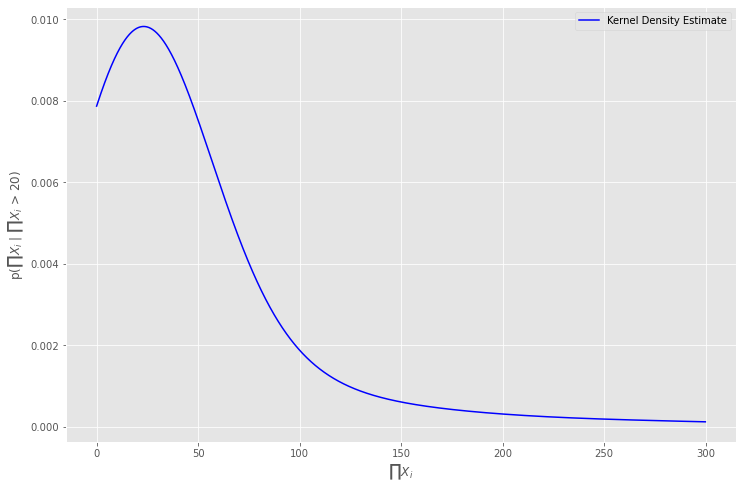

In [10]:
Prod = np.arange(0, 300, 0.1)
kde = gaussian_kde(Prod_sim, bw_method='silverman')
pdf_kde = kde(Prod)

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(Prod, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel(r'$\prod{X_i}$')
plt.ylabel(r'p($\prod{X_i}$ | $\prod{X_i}$ > 20)')
plt.legend()
plt.show()

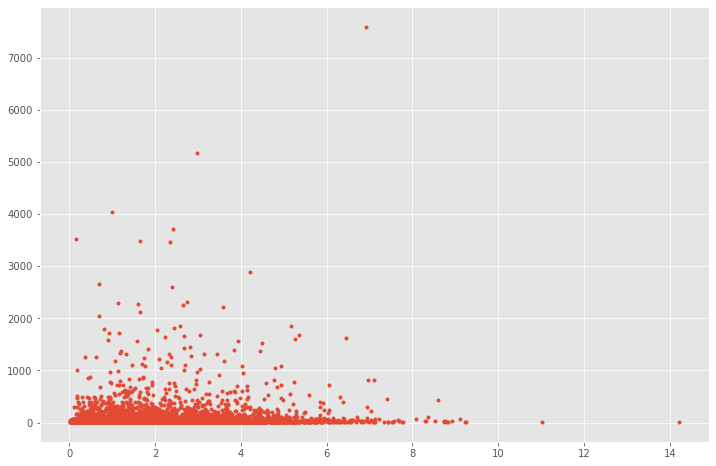

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(x1_sim, Prod_sim, '.')
plt.show()

# HW1: Memoryless Property

In [12]:
initial = [0.6,0.6,1,1,1.8,2,2,2,2,2]
x1_MP = []
Prod_MP = []
x = initial.copy()

for i in range(10000):
    for j in range(10):
        x_other = x[:j] + x[j+1:]
        Prod_other= np.prod(x_other)
        minimum = 20 / Prod_other
        x[j] = expon.rvs(loc = minimum) 
    x1_MP.append(x[0])
    Prod_MP.append(np.prod(x))

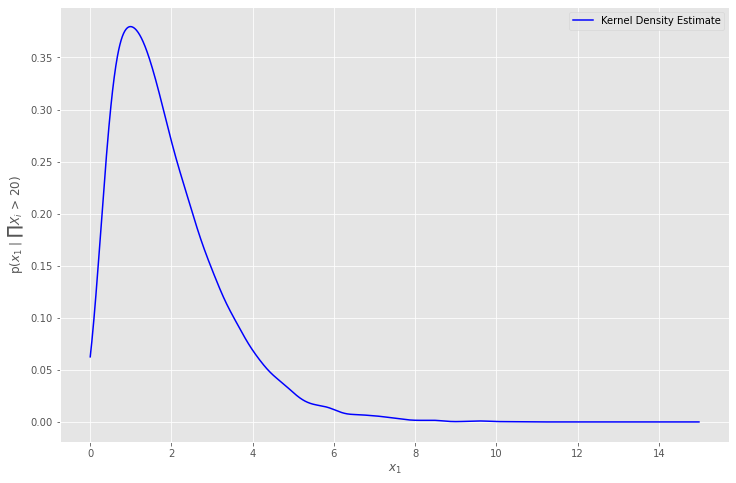

In [13]:
x1 = np.arange(0, 15, 0.01)
kde = gaussian_kde(x1_MP, bw_method='silverman')
pdf_kde = kde(x1)

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(x1, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel(r'$x_1$')
plt.ylabel(r'p($x_1$ | $\prod{X_i}$ > 20)')
plt.legend()
plt.show()

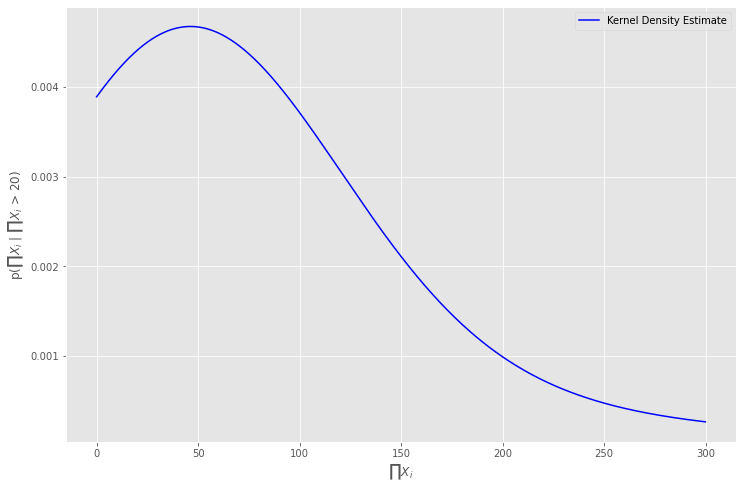

In [14]:
Prod = np.arange(0, 300, 0.1)
kde = gaussian_kde(Prod_MP, bw_method='silverman')
pdf_kde = kde(Prod)

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(Prod, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel(r'$\prod{X_i}$')
plt.ylabel(r'p($\prod{X_i}$ | $\prod{X_i}$ > 20)')
plt.legend()
plt.show()

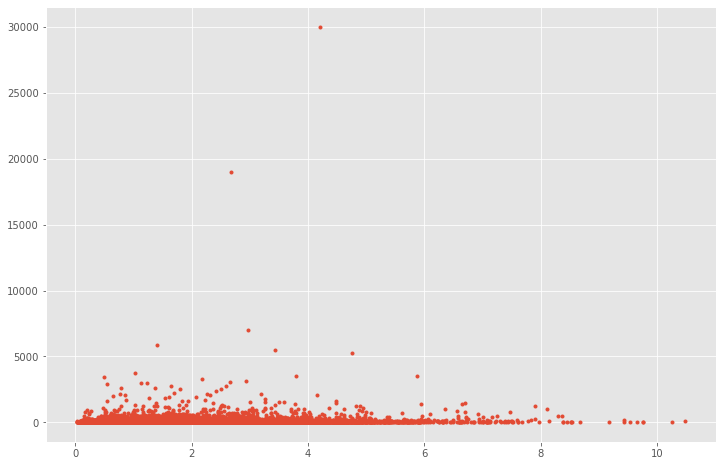

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(x1_MP, Prod_MP, '.')
plt.show()

In [16]:
# Mean Comparison!

[np.mean(x1_sim), np.mean(x1_MP)]

[1.8113154441195067, 1.9148485856294497]

# Playing with various sampling methods

https://chi-feng.github.io/mcmc-demo/  
Gibbs-Sampling 의 한계가 뚜렷하다.  
스터디에서 의견 나눔.